In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv ('/content/Assignment3_dataset.csv')
x= data.iloc[:,0:8].values
y= data.iloc[:,8].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False)

In [ ]:
x_train

array([[0.41176471, 0.62311558, 0.57377049, ..., 0.38002981, 0.0354398 ,
        0.26666667],
       [0.29411765, 0.54271357, 0.59016393, ..., 0.53800298, 0.07899231,
        0.2       ],
       [0.05882353, 0.43718593, 0.49180328, ..., 0.55439642, 0.18403074,
        0.01666667],
       ...,
       [0.52941176, 0.7638191 , 0.63934426, ..., 0.50968703, 0.34799317,
        0.2       ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333],
       [0.11764706, 0.52763819, 0.47540984, ..., 0.52011922, 0.06276687,
        0.06666667]])

# **1.**

**a**. **Provide** **the** **accuracy** **of** **LR** **and** **K**-NN **classifier** **as** **baseline** **performances**. 

Accuracy of LR is better than KNN

In [ ]:
clf_LR = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred_LR=clf_LR.predict(x_test)
accuracy_score(y_test, y_pred_LR)


0.7708333333333334

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
y_pred_knn=clf_knn.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.7604166666666666

**b**. **Provide** **2D** **TSNE** **plots**, **one** **for** **the** **training** **set** **and** **one** **for** **the** **test** **set**.

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Training plot Tsne**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 576 samples in 0.001s...
[t-SNE] Computed neighbors for 576 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 576 / 576
[t-SNE] Mean sigma: 0.140740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.457062
[t-SNE] KL divergence after 1000 iterations: 0.950102


[Text(0.5, 1.0, 'data T-SNE projection')]

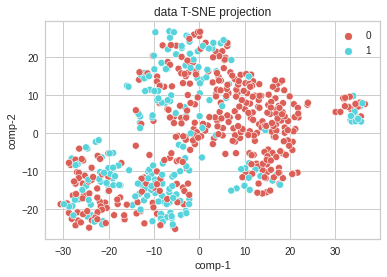

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_train) 
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="data T-SNE projection") 

**Test Plot Tsne**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.001s...
[t-SNE] Computed neighbors for 192 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.179733
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.544479
[t-SNE] KL divergence after 800 iterations: 0.548004


[Text(0.5, 1.0, 'data T-SNE projection')]

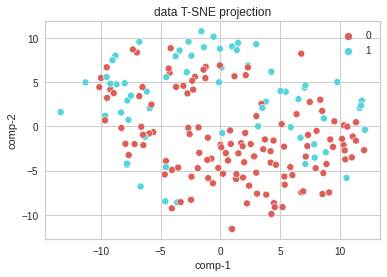

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_test) 
df = pd.DataFrame()
df["y"] = y_test
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="data T-SNE projection") 

# **2. Choose the best number of cluster for k-means clustering algorithm**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**a**. **Plot the** **silhouette** **score** **vs** **the** **number** **of** **clusters**.

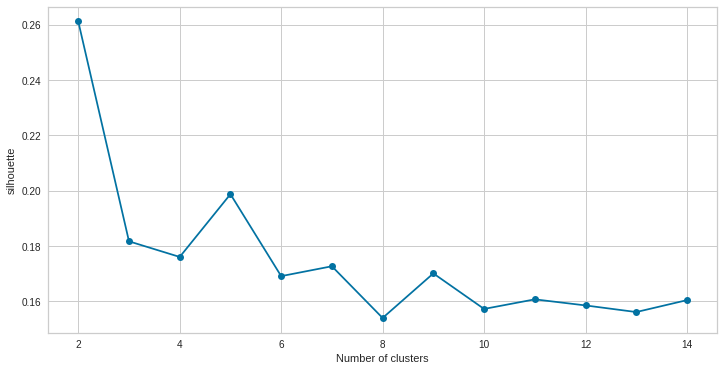

In [ ]:
max_k=15
cluster_num = []

#silhouette
sil_err = []

for i in range(2, max_k):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    cluster_num.append(i)
    sil_err.append(silhouette_score(x, kmeans.labels_))

plt.figure(figsize=(12,6))
plt.plot(cluster_num, sil_err, marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.show()

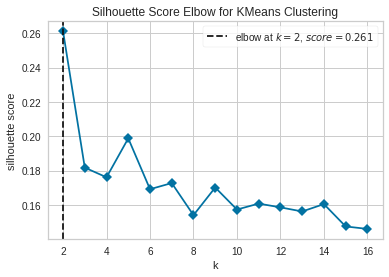

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=0), x, k=(2,17),metric='silhouette',timings=False)  

pass

**b**. **The** **optimal** **number** **is** **2**

**c**. **Plot** **the** **clustered** **data** **with** **optimum** **number** **of** **clusters**. 

In [ ]:
pca = PCA(n_components = 2)
#Transform the data
x_new = pca.fit_transform(x)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_new)

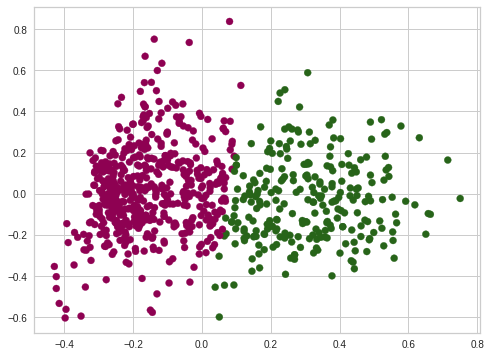

In [ ]:
# Visualize it:

plt.figure(figsize=(8, 6))
plt.scatter(x_new[:,0], x_new[:,1], c=kmeans.labels_.astype(float),cmap="PiYG")


# **3. Apply the following Dimensionality Reduction (DR) methods:**
# **PCA(n components=n, random state=0)**

(**a**) **Find** **the** **best** **value** **of** **n** **components**, **based** **on** **test** **accuracies**, **for** **both** **classifiers**
(**LR** **and** K-**NN**). 

In [ ]:
Acc_LR=[]
Acc_knn=[]
for i in range(0,8):
  n=[1,2,3,4,5,6,7,8]
  pca = PCA(n_components=n[i], random_state=0)
  PCA_train= pca.fit_transform(x_train)
  PCA_test= pca.transform(x_test)

  clf_LR = LogisticRegression(random_state=0).fit(PCA_train, y_train)
  y_pred_LR=clf_LR.predict(PCA_test)
  acc1=accuracy_score(y_test, y_pred_LR)
  Acc_LR.append(acc1)

  clf_knn = KNeighborsClassifier(n_neighbors=3).fit(PCA_train,y_train)
  y_pred_knn=clf_knn.predict(PCA_test)
  acc2=accuracy_score(y_test, y_pred_knn)
  Acc_knn.append(acc2)
print(Acc_LR)
print(Acc_knn)

[0.7083333333333334, 0.7083333333333334, 0.7604166666666666, 0.7604166666666666, 0.7604166666666666, 0.7552083333333334, 0.7864583333333334, 0.7708333333333334]
[0.6302083333333334, 0.671875, 0.671875, 0.7291666666666666, 0.7239583333333334, 0.71875, 0.765625, 0.7604166666666666]


**b**.**Plot** **the** **Number** **of** **Components**-**Accuracy** **graph** **with** **baseline** **performances** **for**
**each** **classifier** **as** **shown** **below** **3**. **The** **Graph** **should** **be** **plotted** **based** **on** **the** **test**
**accuracy**. (Use bar chart)

No handles with labels found to put in legend.


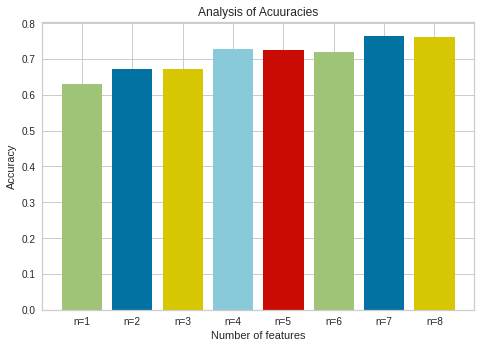

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('Number of features')
ax.set_ylabel('Accuracy')
ax.set_title('Analysis of Acuuracies')

Cases = ['n=1', 'n=2', 'n=3', 'n=4','n=5','n=6','n=7','n=8']
ax.bar(Cases[0] ,Acc_knn[0] ,color = 'g')
ax.bar(Cases[1] ,Acc_knn[1] ,color = 'b')
ax.bar(Cases[2] ,Acc_knn[2] ,color = 'y')
ax.bar(Cases[3] ,Acc_knn[3] ,color = 'c')
ax.bar(Cases[4] ,Acc_knn[4] ,color = 'r')
ax.bar(Cases[5] ,Acc_knn[5] ,color = 'g')
ax.bar(Cases[6] ,Acc_knn[6] ,color = 'b')
ax.bar(Cases[7] ,Acc_knn[7] ,color = 'y')

plt.legend()

No handles with labels found to put in legend.


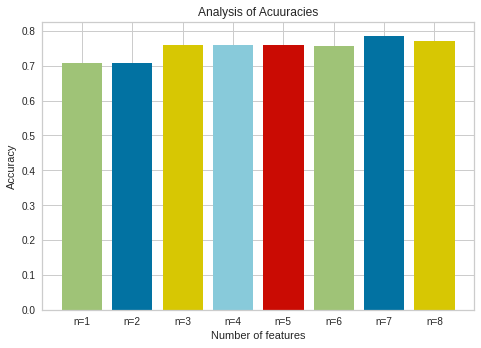

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('Number of features')
ax.set_ylabel('Accuracy')
ax.set_title('Analysis of Acuuracies')

Cases = ['n=1', 'n=2', 'n=3', 'n=4','n=5','n=6','n=7','n=8']
ax.bar(Cases[0] ,Acc_LR[0] ,color = 'g')
ax.bar(Cases[1] ,Acc_LR[1] ,color = 'b')
ax.bar(Cases[2] ,Acc_LR[2] ,color = 'y')
ax.bar(Cases[3] ,Acc_LR[3] ,color = 'c')
ax.bar(Cases[4] ,Acc_LR[4] ,color = 'r')
ax.bar(Cases[5] ,Acc_LR[5] ,color = 'g')
ax.bar(Cases[6] ,Acc_LR[6] ,color = 'b')
ax.bar(Cases[7] ,Acc_LR[7] ,color = 'y')

plt.legend()

**c**. **Provide** **2D** **TSNE** **plots**, **one** **for** **the** **training** **set** **and** **one** **for** **the** **test** **set**. 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 576 samples in 0.001s...
[t-SNE] Computed neighbors for 576 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 576 / 576
[t-SNE] Mean sigma: 0.135351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.458267
[t-SNE] KL divergence after 1000 iterations: 0.913297


[Text(0.5, 1.0, 'Training T-SNE projection')]

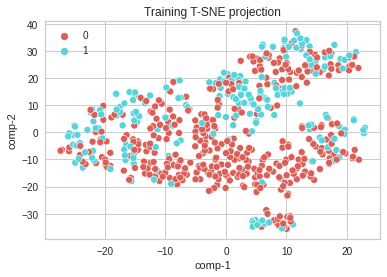

In [ ]:
pca = PCA(n_components=7, random_state=0)

PCA_train_new= pca.fit_transform(x_train)
PCA_test_new= pca.transform(x_test)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(PCA_train_new) 
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Training T-SNE projection") 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.001s...
[t-SNE] Computed neighbors for 192 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.176144
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.783615
[t-SNE] KL divergence after 1000 iterations: 0.536057


[Text(0.5, 1.0, 'Test T-SNE projection')]

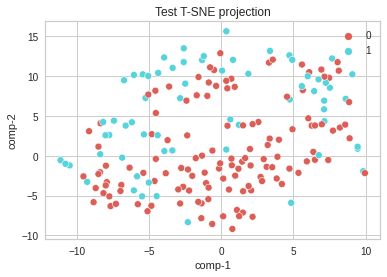

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(PCA_test_new) 
df = pd.DataFrame()
df["y"] = y_test
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Test T-SNE projection") 

# **4**.**Use** **the** **following** **Feature** **Selection** **methods** (**one** **for** **each** **method** **bold text**). **Find** **the** **best** **number** **of** **features** **based** **on** **both**, **the** **LR** **and** K-**NN** **classifiers’** **test** **accuracies**

(**a**) **Filter** **Methods** (**Information** **Gain**, **Variance** **Threshold** **etc**.). **Plot** **the** **number** **of**
**features** **versus** **accuracy** **graph** **with** **the** **improved** **baseline** **performance** **as** **shown** **in** **Q3**, **using** **only** **the** **method** **that** **gives** **you** **the** **best** **test** **accuracy**. 

 Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
acc1=[]
acc2=[]
selected_column=[]
for i in range(1,9):
  selector = VarianceThreshold(threshold=0.02)
  x_train_variance= selector.fit_transform(x_train[:,0:i])
  x_test_variance= selector.transform(x_test[:,0:i])

  cols = selector.get_support(indices=True)
  selected_columns = x_train[:,cols]
  selected_column.append(selected_columns)
  

  clf_LR = LogisticRegression(random_state=0).fit(x_train_variance, y_train)
  y_pred_LR=clf_LR.predict(x_test_variance)
  acc_LR=accuracy_score(y_test, y_pred_LR)
  acc1.append(acc_LR)

  clf_knn = KNeighborsClassifier(n_neighbors=3).fit(x_train_variance,y_train)
  y_pred_knn=clf_knn.predict(x_test_variance)
  acc_knn=accuracy_score(y_test, y_pred_knn)
  acc2.append(acc_knn)


print(acc1)
print(acc2)
# print(selected_column)

[0.6666666666666666, 0.78125, 0.7760416666666666, 0.765625, 0.765625, 0.765625, 0.7708333333333334, 0.78125]
[0.6666666666666666, 0.6875, 0.703125, 0.703125, 0.703125, 0.703125, 0.7291666666666666, 0.7552083333333334]


information gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import SelectKBest
import numpy as np

In [ ]:
def select_feature(X_train, y_train, X_test, y_test, FSM, model):
  fs = FSM
  fs.fit(X_train, y_train)
  X_train_new = fs.transform(X_train)
  X_test_new = fs.transform(X_test) 
  model.fit(X_train_new, y_train)
  y_pred = model.predict(X_test_new)
  acc = accuracy_score(y_test, y_pred) * 100
  
  return acc

Maximum accuracy: 78.125
Best number of features: 3


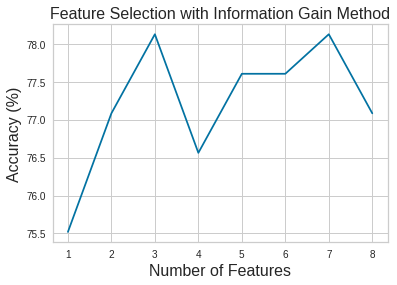

In [ ]:
model =LogisticRegression()
acc_dict = {}
for nf in range(1,9):
  fsm =  SelectKBest(MIC, k=nf)
  acc = select_feature(x_train, y_train, x_test, y_test, fsm, model)
  acc_dict[nf] = acc

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with Information Gain Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

Maximum accuracy: 76.04166666666666
Best number of features: 8


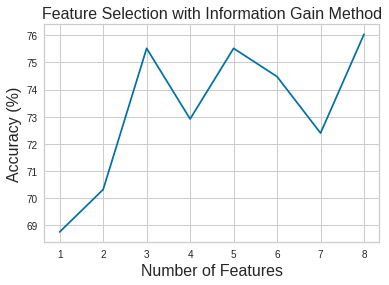

In [ ]:
model =KNeighborsClassifier(n_neighbors=3)
acc_dict = {}
for nf in range(1,9):
  fsm =  SelectKBest(MIC, k=nf)
  acc = select_feature(x_train, y_train, x_test, y_test, fsm, model)
  acc_dict[nf] = acc

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with Information Gain Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

**b**) **Wrapper** **Methods** (**Forward** **or** **Backward** **Feature** **Elimination**, **Recursive** **Feature** **Elimination** **etc**.). **Plot** **the** **number** **of** **features** **versus** **accuracy** **graph** **with** **the** **improved** **baseline** **performance** **as** **shown** **in** **Q3**, **using** **only** ***the*** **method** **that** **gives** **you** **the** **best** **test** **accuracy**

backward Feature Selection

In [ ]:
l = data.iloc[:,:8]
m = data.iloc[:,8:]
m

,Outcome
0,0
1,0
2,0
3,1
4,0
...,...
763,0
764,1
765,0
766,1


In [ ]:
import statsmodels.api as sm


def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features,p_values
    

In [ ]:
f  = backward_elimination(l,m) 
f[0]

['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']

In [ ]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(l,m)


In [ ]:
x_test

array([[0.        , 0.53768844, 0.50819672, ..., 0.54545455, 0.28992314,
        0.06666667],
       [0.        , 0.52261307, 0.52459016, ..., 0.414307  , 0.16054654,
        0.03333333],
       [0.17647059, 0.48241206, 0.45901639, ..., 0.3681073 , 0.36976943,
        0.3       ],
       ...,
       [0.35294118, 0.61809045, 0.59016393, ..., 0.50074516, 0.27967549,
        0.21666667],
       [0.05882353, 0.98492462, 0.62295082, ..., 0.54396423, 0.34030743,
        0.13333333],
       [0.17647059, 0.64824121, 0.52459016, ..., 0.39344262, 0.06020495,
        0.11666667]])

In [ ]:
xtr = x_train_1[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']]
xte= x_test_1[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']]


In [ ]:
lr = LogisticRegression()
lr.fit(xtr, y_train_1)
y_pred_lr = lr.predict(xte)
acc_lr = accuracy_score(y_test_1, y_pred_lr) * 100
print(acc_lr)


74.47916666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
knn = KNeighborsClassifier()
knn.fit(xtr, y_train_1)
y_pred_knn = knn.predict(xte)
acc = accuracy_score(y_test_1, y_pred_knn) * 100
print(acc_knn)

0.7552083333333334


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)





(**c**) **Provide** **2D** **TSNE** **plots**, **one** **for** **the** **training** **set** **and** **one** **for** **the** **test** **set**, **using**
**only** **the** **best** **method** (**either** **the** **filter** **or** **wrapper**). 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 576 samples in 0.001s...
[t-SNE] Computed neighbors for 576 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 576 / 576
[t-SNE] Mean sigma: 0.099636
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.603745
[t-SNE] KL divergence after 1000 iterations: 0.918580


[Text(0.5, 1.0, 'data T-SNE projection')]

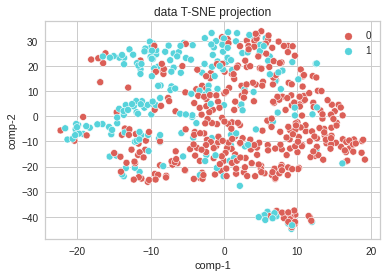

In [ ]:
#Wrapper id better than filter
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(xtr) 
df = pd.DataFrame()
df["y"] = y_train_1
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="data T-SNE projection")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.001s...
[t-SNE] Computed neighbors for 192 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.137189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.601173
[t-SNE] KL divergence after 1000 iterations: 0.538062


[Text(0.5, 1.0, 'data T-SNE projection')]

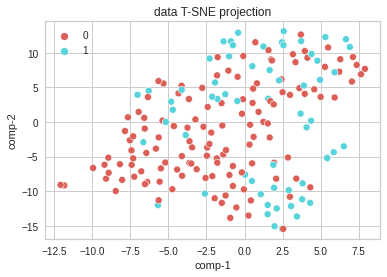

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(xte) 
df = pd.DataFrame()
df["y"] = y_test_1
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="data T-SNE projection")

#**Question 5**

## Plot the silhouette score vs the number of clusters

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7, random_state=0)
PCA_train_3= pca.fit_transform(x)


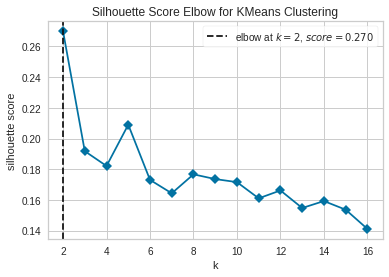

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=0), PCA_train_3, k=(2,17),metric='silhouette',timings=False)  

pass

# **6**. **Choose** **the** **best** **number** **of** **neurons** **for** **SOM** **algorithm**, **using** **the** **best** **features** **from** **Q3** **or** **best** **number** **of** **dimensionality** **Q4**. **You** **might** **find** **it** **easier** **if** **you** **use** **the** **MiniSom** **library**.


(**a**) **Plot** the silhouette score vs the number of neurons (max 30 neurons)

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from minisom import MiniSom
from sklearn_som.som import SOM

In [ ]:
pca = PCA(n_components=7, random_state=0)

PCA_data= pca.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/m

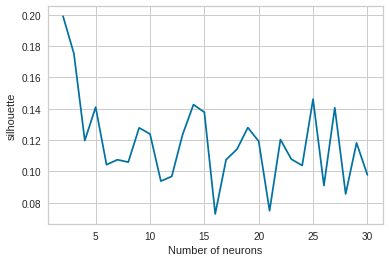

In [ ]:
s = []
for i in range(2,31):
    m = MiniSom(i, 1, 7 ) 
    m.train(PCA_data, 100) 
    preds = []
    for sample in PCA_data :
      preds.append(m.winner(sample)[0])

    s.append(silhouette_score(PCA_data, preds))
    
plt.plot(range(2,31), s)
plt.xlabel('Number of neurons')
plt.ylabel('silhouette')
plt.show()



(b) Determine the optimal number of neurons for SOM 

The optimal number is **2**

(c) Plot the initial and final Neuron positions

In [ ]:
# Initialization and training
som_shape = (2, 1)
som = MiniSom(som_shape[0],som_shape[1], PCA_data.shape[1], random_seed=0)

intial = np.array(som.get_weights())
som.train_batch(PCA_data,2000, verbose=True)
finial = np.array(som.get_weights())

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.39049989972068594


In [ ]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in PCA_data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [ ]:
intial=intial.reshape(2,7)
finial=finial.reshape(2,7)

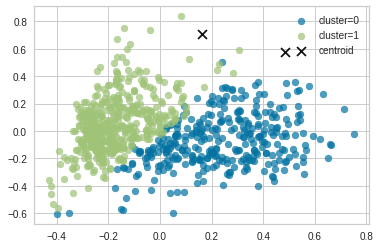

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(PCA_data[cluster_index == c, 0],
                PCA_data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
plt.scatter(intial[:, 0], intial[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

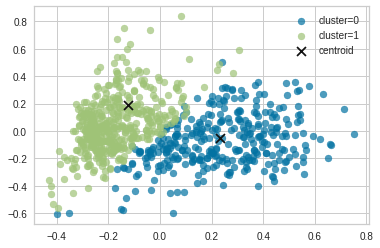

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(PCA_data[cluster_index == c, 0],
                PCA_data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
plt.scatter(finial[:, 0], finial[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

# **7**. **Tune** **the** **epsilon** **(0.3-0.7 )** **and** **minpoints** **(2-15)** **values** **to** **obtain** **the** **same** **number** **of** **clusters** **in** **Q6** **by** **using** **DBSCAN**. **Provide** **two** **separate** **plots**; **where** **you** **show** **only** **the** **best** **10** **combinations** **of** **epsilon** **and** **minpoints** **that** **brings** **you** **closer** **to** **the** **desired** **cluster** **number** **with** **the** **highest** **silhouette** **score**.


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.utils.multiclass import unique_labels

In [ ]:
#find DBSCAN optimal eps and min-samples 
epsList, msList, accList,clusters = list(), list(), list(), list()
for eps in tqdm(np.arange(0.3, 0.7, 0.1)):
  for ms in range(2, 15):
    model = DBSCAN(eps=eps, min_samples=ms)
    predLabels = model.fit_predict(x)
    score = silhouette_score(x, predLabels, random_state=0)
    epsList.append(eps)
    msList.append(ms)
    accList.append(score)
    clusters.append(len(unique_labels(predLabels)))
epsList, msList, accList, clusters= np.array(epsList), np.array(msList), np.array(accList), np.array(clusters)
print(epsList, msList, accList, clusters)

100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6] [ 2  3  4  5  6  7  8  9 10 11 12 13 14  2  3  4  5  6  7  8  9 10 11 12
 13 14  2  3  4  5  6  7  8  9 10 11 12 13 14  2  3  4  5  6  7  8  9 10
 11 12 13 14] [0.12427501 0.18144829 0.25570374 0.25550342 0.25071393 0.25569042
 0.25546474 0.24137344 0.23483044 0.23167176 0.22396659 0.28383905
 0.28248988 0.28693763 0.41150418 0.40738576 0.39902473 0.39902473
 0.39902473 0.39475775 0.39208884 0.39133404 0.39133404 0.39133404
 0.39133404 0.38693072 0.44374417 0.44374417 0.48500793 0.48500793
 0.48500793 0.48500793 0.48228732 0.48228732 0.48407501 0.48407501
 0.48407501 0.48407501 0.48407501 0.44374417 0.44374417 0.44374417
 0.44374417 0.44374417 0.44374417 0.44374417 0.48500793 0.48500793
 0.48500793 0.48500793 0.48500793 0.48500793] [6 4 4 4 4 3 3 3 3 3 3 2 2 3 2 2 2 2 2 2 2 2 2

In [ ]:
df = pd.DataFrame({"epsilon":epsList,  
                     "minpoints":msList,
                     "sillouhtte":accList,
                     "Clusters":clusters})

In [ ]:
df_new=df.nlargest(10, 'sillouhtte')
df_new

,epsilon,minpoints,sillouhtte,Clusters
28,0.5,4,0.485008,2
29,0.5,5,0.485008,2
30,0.5,6,0.485008,2
31,0.5,7,0.485008,2
46,0.6,9,0.485008,2
47,0.6,10,0.485008,2
48,0.6,11,0.485008,2
49,0.6,12,0.485008,2
50,0.6,13,0.485008,2
51,0.6,14,0.485008,2


(**a**) **First** **plot** **is** **epsilon** **vs** **number** **of** **clusters**.

<function matplotlib.pyplot.show>

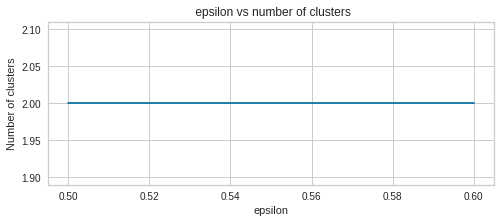

In [ ]:
#plot epsilon vs number of clusters for all 
plt.figure(figsize=(8,3))
plt.plot(df_new['epsilon'],df_new['Clusters'])
plt.title(' epsilon vs number of clusters')
plt.xlabel("epsilon")
plt.ylabel("Number of clusters")
plt.show

(**b**) **Second** **plot** **is** **minpoints** **vs** **number** **of** **clusters**.

<function matplotlib.pyplot.show>

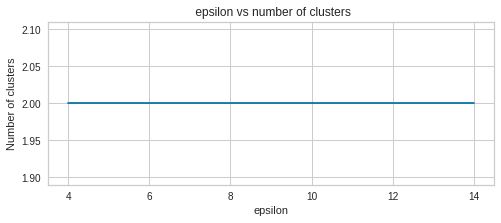

In [ ]:
#plot epsilon vs number of clusters for all 
plt.figure(figsize=(8,3))
plt.plot(df_new['minpoints'],df_new['Clusters'])
plt.title(' epsilon vs number of clusters')
plt.xlabel("epsilon")
plt.ylabel("Number of clusters")
plt.show